# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
matname = 'basics'

In [4]:
from shl_scripts.shl_experiments import SHL

In [5]:
shl = SHL(homeo_method='HAP', DEBUG_DOWNSCALE=1, verbose=10)
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  SHL(height=256, width=256, patch_width=21, N_patches=65536, datapath='../database/', name_database='kodakdb', do_mask=True, do_bandpass=True, over_patches=16, patch_ds=1, n_dictionary=676, learning_algorithm='mp', fit_tol=None, l0_sparseness=34, alpha_MP=0.95, one_over_F=True, n_iter=4097, eta=0.005, beta1=0.95, beta2=0.999, epsilon=1e-08, do_precision=False, eta_precision=0.0005, homeo_method='HAP', eta_homeo=0.04, alpha_homeo=2.5, C=3.0, nb_quant=128, P_cum=None, do_sym=False, seed=42, patch_norm=False, batch_size=1024, record_each=32, record_num_batches=1024, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, cache_dir='cache_dir')
 |  
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_width=21, N_patches=65536, datap

In [6]:
!ls -l {shl.cache_dir}/{matname}*

-rw-r--r--  1 laurentperrinet  staff  354332288 Jul 19 08:59 cache_dir/basics_coding.npy
-rw-r--r--  1 laurentperrinet  staff  231154688 Jul 18 17:05 cache_dir/basics_data.npy
-rw-r--r--  1 laurentperrinet  staff    7589034 Jul 19 08:58 cache_dir/basics_dico.pkl


In [7]:
!rm {shl.cache_dir}/{matname}*
!ls -l {shl.cache_dir}/{matname}*

ls: cache_dir/basics*: No such file or directory


In [8]:
data = shl.get_data(matname='data')
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.sum(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

Extracting data..loading the data called : cache_dir/data_data
Data is of shape : (65520, 441) - done in 0.13s.
number of patches, size of patches =  (65520, 441)
average of patches =  -4.1888600727021664e-05  +/-  0.006270387629074682
average energy of data =  5.477384347012861 +/- 1.557168782769748


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_learn.py) script):

No cache found cache_dir/basics_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   4097 (elapsed time:   2s,   0mn   2s)
Iteration  33 /   4097 (elapsed time:  68s,   1mn   8s)
Iteration  65 /   4097 (elapsed time:  131s,   2mn  11s)
Iteration  97 /   4097 (elapsed time:  193s,   3mn  13s)
Iteration  129 /   4097 (elapsed time:  258s,   4mn  18s)
Iteration  161 /   4097 (elapsed time:  321s,   5mn  21s)
Iteration  193 /   4097 (elapsed time:  386s,   6mn  26s)
Iteration  225 /   4097 (elapsed time:  447s,   7mn  27s)
Iteration  257 /   4097 (elapsed time:  510s,   8mn  30s)
Iteration  289 /   4097 (elapsed time:  572s,   9mn  32s)
Iteration  321 /   4097 (elapsed time:  634s,  10mn  34s)
Iteration  353 /   4097 (elapsed time:  696s,  11mn  36s)
Iteration  385 /   4097 (elapsed time:  759s,  12mn  39s)
Iteration  417 /   4097 (elapsed time:  822s,  13mn  42s)
Iteration  449 /   4097 (elapsed time:  884s,  14mn  44s)
Iteration  481 /   4097 (el

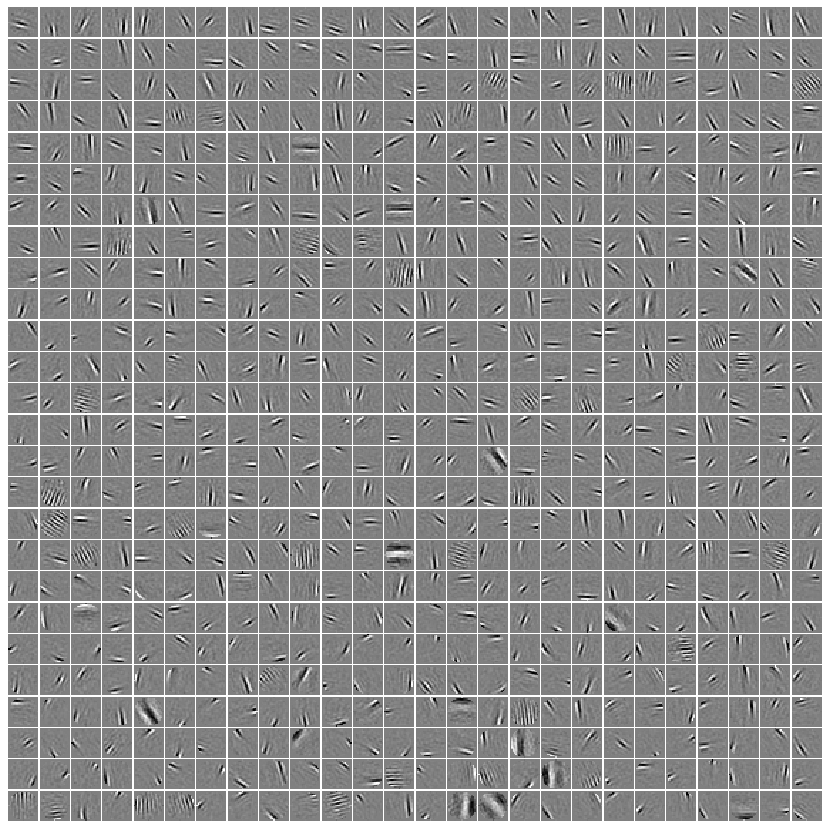

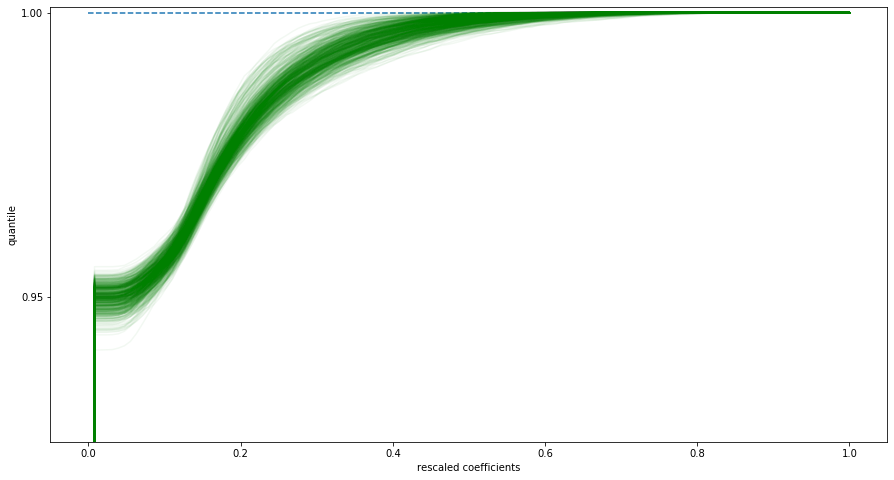

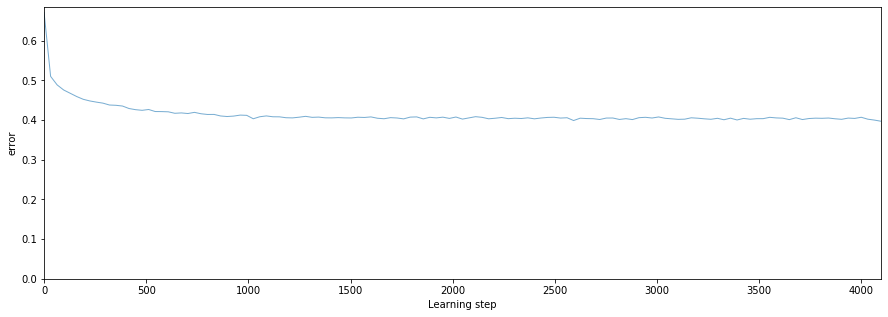

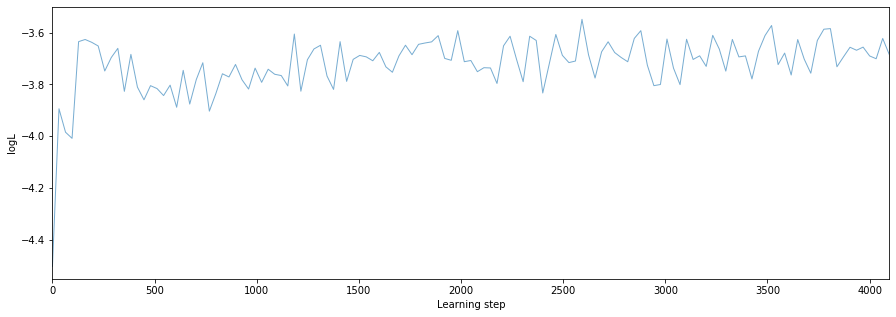

In [9]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'show_Pcum']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
help(dico)

Help on SparseHebbianLearning in module shl_scripts.shl_learn object:

class SparseHebbianLearning(builtins.object)
 |  SparseHebbianLearning(fit_algorithm, dictionary=None, precision=None, eta=0.003, beta1=0.9, beta2=0.999, epsilon=1e-08, homeo_method='HEH', eta_homeo=0.05, alpha_homeo=0.0, C=5.0, nb_quant=256, P_cum=None, n_dictionary=None, n_iter=10000, batch_size=32, l0_sparseness=None, fit_tol=None, alpha_MP=1.0, do_precision=False, eta_precision=0.01, do_sym=False, record_each=200, record_num_batches=4096, verbose=False, one_over_F=True)
 |  
 |  Sparse Hebbian learning
 |  
 |  Finds a dictionary (a set of atoms) that can best be used to represent data
 |  using a sparse code.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_dictionary : int,
 |      Number of dictionary elements to extract
 |  
 |  eta : float or dict
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  n_iter : int,
 |      total number of iterations to perform
 |  
 |  eta_homeo : float
 |    

In [11]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (676, 441)
average of filters =  -5.951050201271194e-06 +/- 0.0010460191388571684
average energy of filters =  1.0 +/- 4.0957250610807073e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_encode.py) script)

In [12]:
sparse_code = shl.code(data, dico, matname=matname, l0_sparseness=45)
print('number of codes, size of codewords = ', sparse_code.shape)
print('average of codewords = ', sparse_code.mean())
print('average energy of codewords = ', sparse_code.std(axis=0).mean())
print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

No cache found cache_dir/basics_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp number of codes, size of codewords =  (65520, 676)
average of codewords =  0.04215342004687698
average energy of codewords =  0.19996493427316903
std of the average of individual patches =  0.004050780510815464


In [13]:
patches = sparse_code @ dico.dictionary
print('number of codes, size of reconstructed images = ', patches.shape)

number of codes, size of reconstructed images =  (65520, 441)


In [14]:
error = data - patches
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SE = np.sqrt(np.sum(error**2, axis=1))
print('average energy of residual = ', SE.mean(), '+/-', SE.std())

average of residual patches =  -0.0001192204596831446 +/- 0.0040403364310191755
average energy of residual =  1.9064312414782316 +/- 0.6355305275517291


## Version used

In [15]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.7.4 64bit [Clang 10.0.1 (clang-1001.0.46.4)]
IPython 7.6.1
OS Darwin 18.6.0 x86_64 i386 64bit
numpy 1.16.4
shl_scripts 20171221
Fri Jul 19 12:50:42 2019 CEST